# Intro Dimensionality Reduction

* Many machine learning problems involve thousands or even millions of
features for each training instance. Not only do all these features make
training extremely slow, but they can also make it much harder to find a
good solution, as you will see. This problem is often referred to as the curse
of dimensionality


* Reducing dimensionality does cause some information loss, just like
compressing an image to JPEG can degrade its quality, so even though it
will speed up training, it may make your system perform slightly worse.

* Apart from speeding up training, dimensionality reduction is also extremely
useful for data visualization. Reducing the number of dimensions down to
two (or three) makes it possible to plot a condensed view of a high-
dimensional training set on a graph and often gain some important insights
by visually detecting patterns

## The Curse of Dimensionality

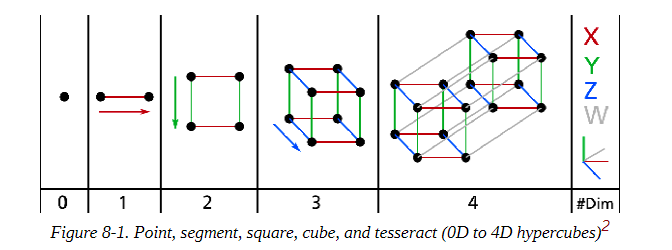

# Main Approaches for Dimensionality Reduction

## 1- Projection

If we project every training instance perpendicularly onto this subspace, we get the new 2D dataset

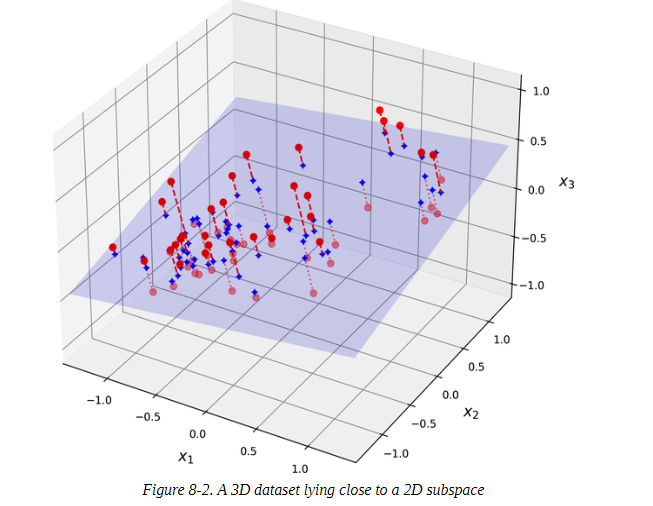



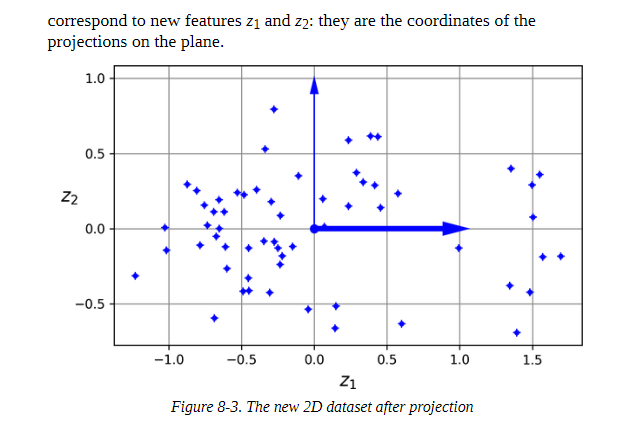

## 2- Manifold Learning

However, projection is not always the best approach to dimensionality
reduction. In many cases the subspace may twist and turn,

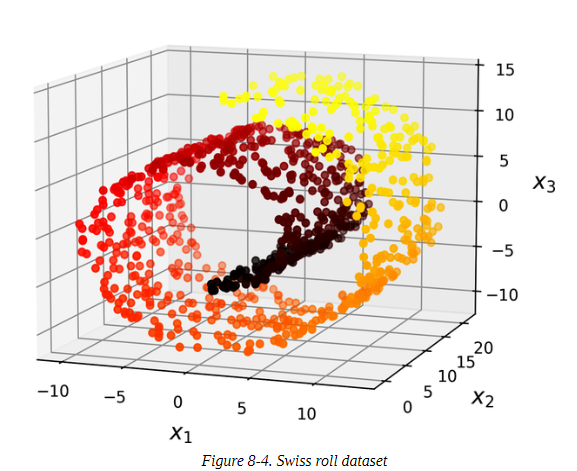

* What you probably want instead is to unroll the Swiss roll to obtain the 2D
dataset

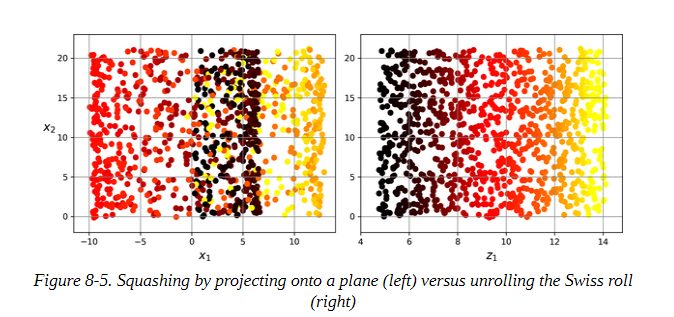

* **In short**, reducing the dimensionality of your training set before training a
model will usually speed up training, but it may not always lead to a better
or simpler solution; it all depends on the dataset

# PCA

Principal component analysis (PCA) is by far the most popular
dimensionality reduction algorithm. First it identifies the hyperplane that
lies closest to the data, and then it projects the data onto it

## Preserving the Variance

Before you can project the training set onto a lower-dimensional
hyperplane, you first need to choose the right hyperplane

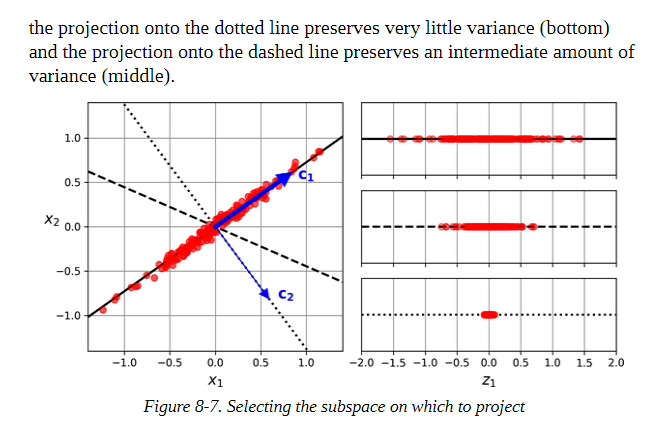


Another way to justify this choice is that it is the axis that
minimizes the mean squared distance between the original dataset and its
projection onto that axis

## Principal Components

* PCA identifies the axis that accounts for the largest amount of variance in
the training set. In Figure 8-7, it is the solid line. It also finds a second axis,
orthogonal to the first one, that accounts for the largest amount of the
remaining variance.


* The i axis is called the i principal component (PC) of the data



**How can you find the principal components of a training set**

there is a standard matrix factorization technique called singular value
decomposition (SVD) that can decompose the training set matrix **X** into the
matrix multiplication of three matrices **U Σ V** , where **V** contains the unit
vectors that define all the principal components that you are looking for


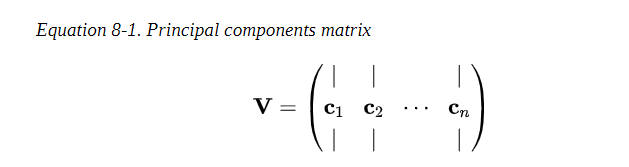

In [ ]:
import numpy as np

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X += [0.2, 0, 0.2]  # shift a bit

X_centered = X - X.mean() # Scikit-Learn’s PCA classes take care of centering the data for you
U, s, V = np.linalg.svd(X_centered)

# check the Shape of V
print("Shape of V", V.shape)

Shape of V (3, 3)


## Projecting Down to d Dimensions

* Once you have identified all the principal components, you can reduce the
dimensionality of the dataset down to d dimensions by projecting it onto the
hyperplane defined by the first d principal components


* To project the training set onto the hyperplane and obtain a reduced dataset X of dimensionality d, compute the matrix multiplication of the
training set matrix X by the matrix W , defined as the matrix containing the
first d columns of V

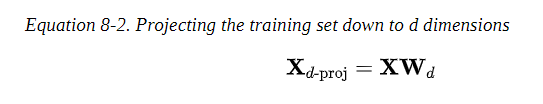

In [ ]:
W2 = V[:2].T
X2d = X_centered @ W2

print("Dim of X2d", X2d.shape)
print("Dim of X_centered", X_centered.shape)

Dim of X2d (60, 2)

Dim of X_centered (60, 3)


In [ ]:
# Using Sklearn

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

## Explained Variance Ratio
Another useful piece of information is the explained variance ratio of each
principal component, available via the
explained_variance_ratio_ variable. The ratio indicates the
proportion of the dataset’s variance that lies along each principal
component

In [ ]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

## Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to,
it is simpler to choose the number of dimensions that add up to a
sufficiently large portion of the variance—say, 95% (An exception to this
rule, of course, is if you are reducing dimensionality for data visualization,
in which case you will want to reduce the dimensionality down to 2 or 3).

In [ ]:
# Example Code

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # d equals 154
d

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.

  warn(


154

Instead of specifying the number of principal components you
want to preserve, you can set n_components to be a float between 0.0
and 1.0, indicating the ratio of variance you wish to preserve

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

## Example for using PCA as preprocessing step


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)

rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [ ]:
# Check best paramters
rnd_search.best_params_


{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

# Exercises

Load the MNIST dataset and split it into a
training set and a test set (take the first 60,000 instances for training,
and the remaining 10,000 for testing). Train a random forest classifier
on the dataset and time how long it takes, then evaluate the resulting
model on the test set. Next, use PCA to reduce the dataset’s
dimensionality, with an explained variance ratio of 95%. Train a new
random forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the
test set. How does it compare to the previous classifier? Try again with
an SGDClassifier. How much does PCA help now?

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Dataset

In [2]:
mnist = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)

print(f'shape Training data : {X_train.shape}', )
print(f'shape Test data : {X_test.shape}', )

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


shape Training data : (60000, 784)
shape Test data : (10000, 784)


## RadomForest without PCA

In [3]:
pipeline_rf_Without_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])
start_time = time.time()
pipeline_rf_Without_pca.fit(X_train, y_train)
time_rf_Without_pca = time.time() - start_time

In [4]:
y_pred_rf_Without_pca = pipeline_rf_Without_pca.predict(X_test)
accuracy_rf_Without_pca = accuracy_score(y_test, y_pred_rf_Without_pca)
print("Full dataset accuracy:", accuracy_rf_Without_pca)
print("Full dataset training time:", time_rf_Without_pca)

Full dataset accuracy: 0.9675
Full dataset training time: 47.898067235946655


In [5]:
print("Full classification report:")
print(classification_report(y_test, y_pred_rf_Without_pca))

Full classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



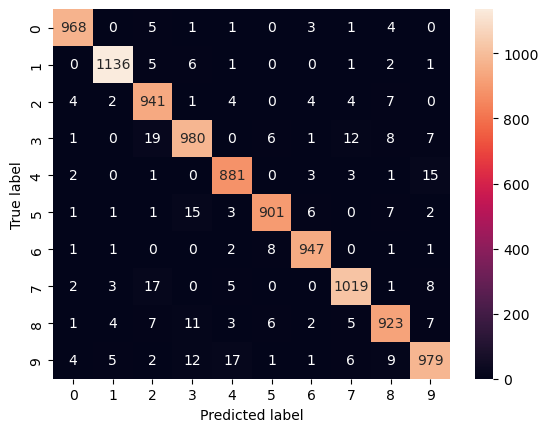

In [6]:
conf_matrix_rf_Without_pca = confusion_matrix(y_test, y_pred_rf_Without_pca)
sns.heatmap(conf_matrix_rf_Without_pca, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Random Forest With PCA

In [7]:
pipeline_rf_with_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])
start_time = time.time()
pipeline_rf_with_pca.fit(X_train, y_train)
time_rf_With_pca = time.time() - start_time

In [8]:
y_pred_rf_With_pca = pipeline_rf_with_pca.predict(X_test)
accuracy_rf_With_pca = accuracy_score(y_test, y_pred_rf_With_pca)
print("Reduced pipeline accuracy:", accuracy_rf_With_pca)
print("Reduced pipeline training time:", time_rf_With_pca)

Reduced pipeline accuracy: 0.9334
Reduced pipeline training time: 169.87466740608215


In [9]:
print("Reduced pipeline classification report:")
print(classification_report(y_test, y_pred_rf_With_pca))

Reduced pipeline classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       983
           1       0.98      0.98      0.98      1152
           2       0.90      0.94      0.92       967
           3       0.90      0.93      0.91      1034
           4       0.92      0.93      0.93       906
           5       0.94      0.89      0.92       937
           6       0.95      0.96      0.96       961
           7       0.93      0.94      0.93      1055
           8       0.94      0.88      0.91       969
           9       0.92      0.90      0.91      1036

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



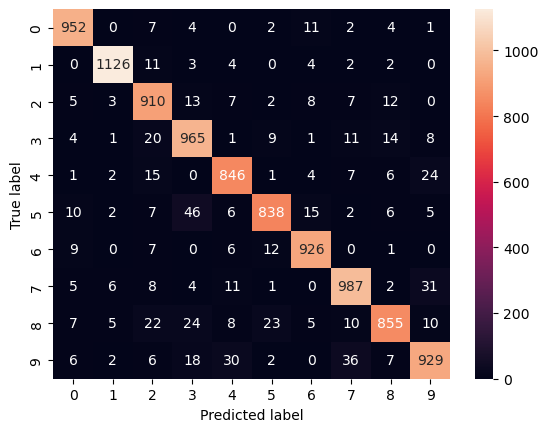

In [10]:
conf_matrix_rf_With_pca = confusion_matrix(y_test, y_pred_rf_With_pca)
sns.heatmap(conf_matrix_rf_With_pca, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## SGD Classifier Without PCA

In [11]:
pipeline_sgd_Without_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('scd', SGDClassifier(random_state=42))
])
start_time = time.time()
pipeline_sgd_Without_pca.fit(X_train, y_train)
time_sgd_Without_pca = time.time() - start_time

In [12]:
y_pred_sgd_Without_pca = pipeline_sgd_Without_pca.predict(X_test)
accuracy_sgd_Without_pca = accuracy_score(y_test, y_pred_sgd_Without_pca)
print("Reduced pipeline accuracy:", accuracy_sgd_Without_pca)
print("Reduced pipeline training time:", time_sgd_Without_pca)

Reduced pipeline accuracy: 0.9027
Reduced pipeline training time: 363.6929597854614


In [13]:
print("Full classification report:")
print(classification_report(y_test, y_pred_sgd_Without_pca))

Full classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       983
           1       0.97      0.96      0.96      1152
           2       0.92      0.89      0.91       967
           3       0.90      0.86      0.88      1034
           4       0.93      0.89      0.91       906
           5       0.89      0.83      0.86       937
           6       0.95      0.94      0.94       961
           7       0.95      0.91      0.93      1055
           8       0.69      0.92      0.79       969
           9       0.91      0.88      0.89      1036

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



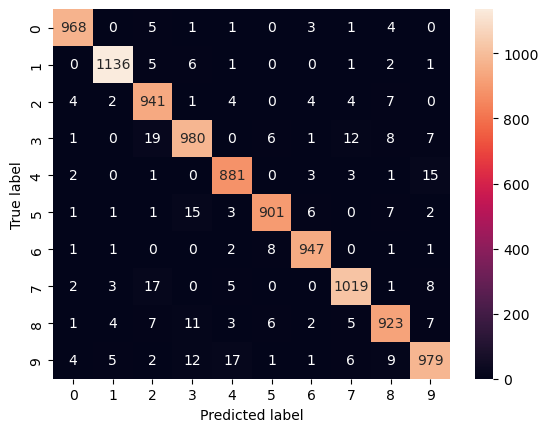

In [14]:
conf_matrix_rf_Without_pca = confusion_matrix(y_test, y_pred_rf_Without_pca)
sns.heatmap(conf_matrix_rf_Without_pca, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## SGD Classifier With PCA

In [15]:
pipeline_sgd_With_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('scd', SGDClassifier(random_state=42))
])
start_time = time.time()
pipeline_sgd_With_pca.fit(X_train, y_train)
time_sgd_With_pca = time.time() - start_time

In [16]:
y_pred_sgd_With_pca = pipeline_sgd_With_pca.predict(X_test)
accuracy_sgd_With_pca = accuracy_score(y_test, y_pred_sgd_With_pca)
print("Reduced pipeline accuracy:", accuracy_sgd_With_pca)
print("Reduced pipeline training time:", time_sgd_With_pca)

Reduced pipeline accuracy: 0.896
Reduced pipeline training time: 213.28536891937256


In [17]:
print("Reduced pipeline classification report:")
print(classification_report(y_test, y_pred_sgd_With_pca))

Reduced pipeline classification report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       983
           1       0.97      0.96      0.96      1152
           2       0.92      0.89      0.90       967
           3       0.91      0.85      0.88      1034
           4       0.93      0.88      0.91       906
           5       0.90      0.81      0.85       937
           6       0.95      0.93      0.94       961
           7       0.95      0.91      0.93      1055
           8       0.64      0.92      0.75       969
           9       0.92      0.85      0.88      1036

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.90      0.90     10000



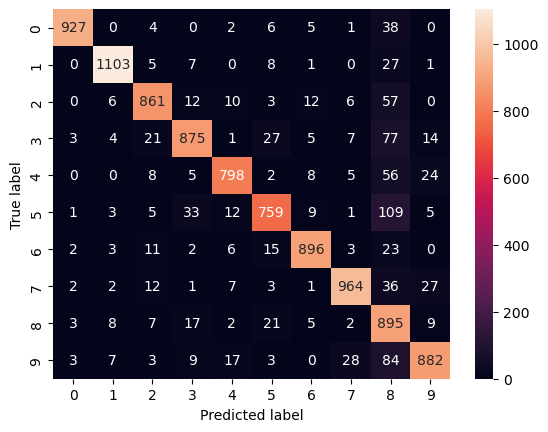

In [18]:
conf_matrix_sgd_With_pca = confusion_matrix(y_test, y_pred_sgd_With_pca)
sns.heatmap(conf_matrix_sgd_With_pca, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

[0.9675, 0.9334, 0.9027, 0.896]


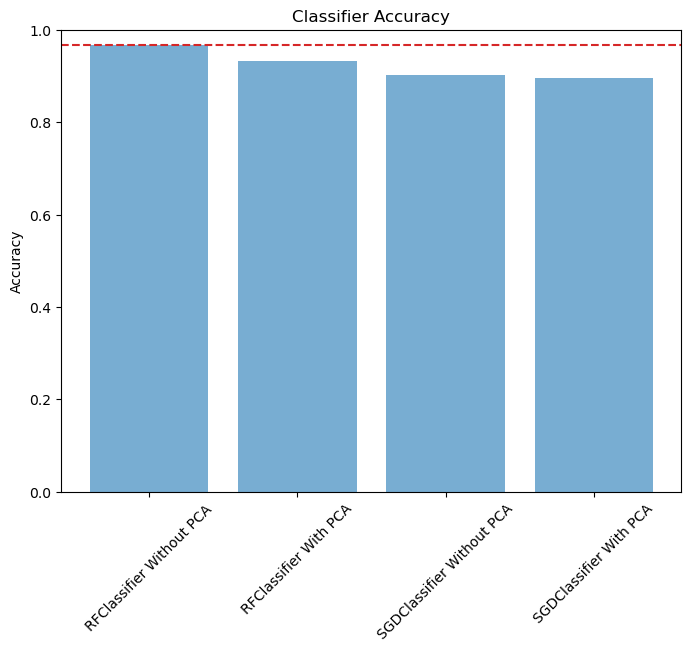

In [19]:
classifiers = ['RFClassifier Without PCA', 'RFClassifier With PCA','SGDClassifier Without PCA', 'SGDClassifier With PCA']
accuracy_scores = [accuracy_rf_Without_pca, accuracy_rf_With_pca, accuracy_sgd_Without_pca, accuracy_sgd_With_pca]
print(accuracy_scores)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(classifiers, accuracy_scores, color='tab:blue', alpha=0.6)
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.axhline(y=max(accuracy_scores), color='tab:red', linestyle='--')
ax.set_title('Classifier Accuracy')
plt.xticks(rotation=45)
plt.show()

[47.898067235946655, 169.87466740608215, 363.6929597854614, 213.28536891937256]


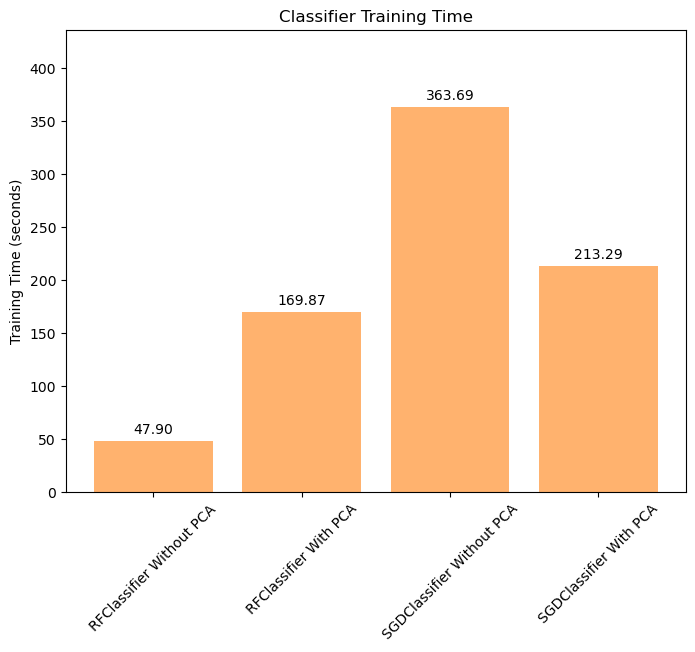

In [20]:
classifiers = ['RFClassifier Without PCA', 'RFClassifier With PCA', 'SGDClassifier Without PCA', 'SGDClassifier With PCA']
training_times = [time_rf_Without_pca, time_rf_With_pca, time_sgd_Without_pca, time_sgd_With_pca]
print(training_times)
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(classifiers, training_times, color='tab:orange', alpha=0.6)
for bar in bars:
    height = bar.get_height()  
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')
    
ax.set_ylabel('Training Time (seconds)')
ax.set_ylim(0, max(training_times)*1.2)
ax.set_title('Classifier Training Time')
plt.xticks(rotation=45)
plt.show()